# 8.1, 8.2

In [2]:
import nltk

## 8.1
Sentence in question:

While hunting in Africa, I shot an elephant in my pajamas. How an elephant got into my pajamas I’ll never know.

In [3]:
from nltk import CFG
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
 """)
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


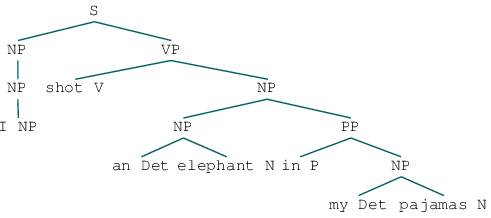

In [69]:
#Possible interpretations of this (1)
sentence = [("I", "NP"), ("shot", "V"), ("an", "Det"), ("elephant", "N"),
("in", "P"), ("my", "Det"), ("pajamas", "N")]
grammar = r"""
    NP: {<Det|N|NP>+}    
    PP: {<P><N|NP>?}
    NP: {<NP><PP>?}
    VP: {<V><NP>?}
"""
cp = nltk.RegexpParser(grammar)
cp.parse(sentence)

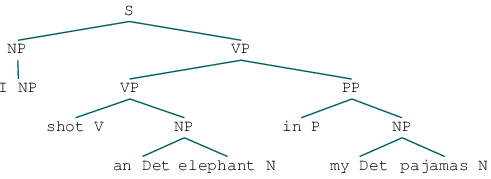

In [75]:
grammar1 = r"""
    NP: {<Det|N|NP>+}    
    PP: {<P><N|NP>?}
    VP: {<V><N|NP>?}
    VP: {<VP><PP>}    
"""
cp1 = nltk.RegexpParser(grammar1)
cp1.parse(sentence)

## 8.2
### Coordinate Structure
If $\left\{ v_1 \right\}$ and $\left\{ v_2 \right\}$ are both phrases of grammatical category $X$, then $\left\{ v_1\textit{ and }v_2\right\}$ is also a phrase of grammatical category $X$.

##### Example 1
- The book's ending was (NP **the worst part** and **the best part** ) for me.

- On land they are (AP **slow** and **clumsy looking**).



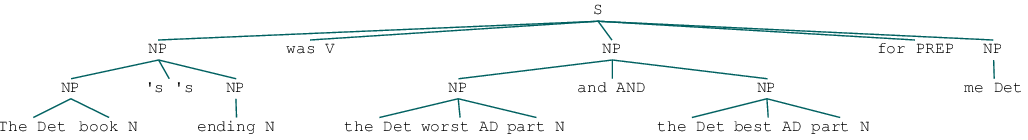

In [104]:
sentence_2 = [("The", "Det"), ("book", "N"), ("'s", "'s"),
              ("ending", "N"), ("was", "V"), ("the", "Det"),
              ("worst", "AD"), ("part", "N"), ("and", "AND"),
              ("the", "Det"), ("best", "AD"), ("part", "N"),
              ("for", "PREP"), ("me", "Det")]
grammar2 = r"""
    NP: {<Det>?<AD>?<Det|N>+}
    NP: {<NP>+<'s|AND>?<NP>+}   
"""
cp3 = nltk.RegexpParser(grammar2)
cp3.parse(sentence_2)

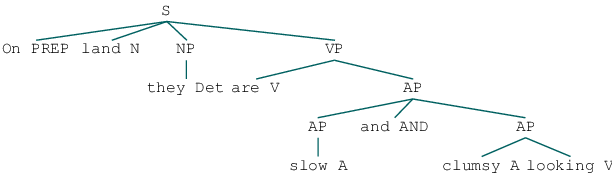

In [114]:
sentence_3 = [("On", "PREP"), ("land", "N"), ("they", "Det"),
              ("are", "V"), ("slow", "A"), ("and", "AND"),
              ("clumsy", "A"), ("looking", "V")]
grammar3 = r"""
    AP: {<A><V>?}
    AP: {<AP><AND>?<AP>}
    NP: {<Det>?<AD>?}
    VP: {<V><AP>?}
"""
cp4 = nltk.RegexpParser(grammar3)
cp4.parse(sentence_3)

### Constituent Structure
Constitutent structure is based on the observation that words combine with other words to form a unit. The validity of the unit is given by its suitability for substitution to form a shorter sentence, without the sentence being ill-formed.

##### Example 2 (Build a tree structure to denote this)
- The little bear saw the fine fat trout in the brook.

"*The little bear*" is a valid unit because it can be substituted with the word "*He*" and the sentence is still valid. 

- **He** (the little bear) saw the fine fat trout in the brook.

In contrast, you cannot do the same with *little bear saw*. It will look weird, like The "**He**" (little bear saw) the fine fat trout in the brook.

Each node in the sentence tree is a **constituent**. The constituents of $S$ are $NP$ and $VP$.

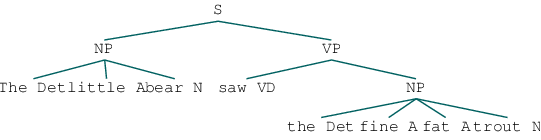

In [123]:
sentence_4 = [("The", "Det"), ("little", "A"), ("bear", "N"),
              ("saw", "VD"), ("the", "Det"), ("fine", "A"),
              ("fat", "A"), ("trout", "N")]
grammar4 = r"""
    NP: {<Det>?<A>+<Det|N>}
    VP: {<V.*><NP>?}    
"""
cp5 = nltk.RegexpParser(grammar4)
cp5.parse(sentence_4)

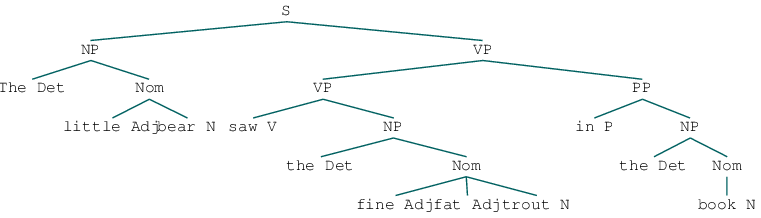

In [135]:
sentence_5 = [("The", "Det"), ("little", "Adj"), ("bear", "N"),
              ("saw", "V"), ("the", "Det"), ("fine", "Adj"),
              ("fat", "Adj"), ("trout", "N"), ("in", "P"), 
              ("the", "Det"), ("book", "N")]
grammar4 = r"""
    Nom: {<Adj>*<N>}
    NP: {<Det>?<Nom>}
    PP: {<P><NP>?}    
    VP: {<V><NP>?} 
    VP: {<VP><NP|PP>?}     
"""
cp5 = nltk.RegexpParser(grammar4)
cp5.parse(sentence_5)